In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

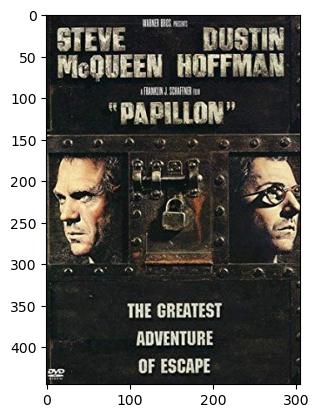

In [3]:
image = cv.imread('./papilon.jpg')
plt.imshow(image[...,::-1])

In [5]:
const_matrix = np.ones(image.shape, dtype = "uint8") * 100

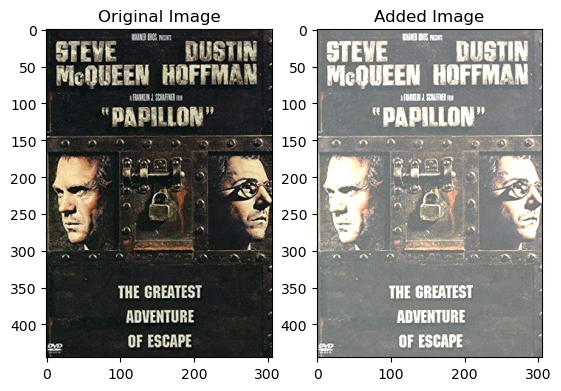

In [7]:
added = cv.add(image, const_matrix)

plt.subplot(121);plt.imshow(image[...,::-1]);plt.title("Original Image");
plt.subplot(122);plt.imshow(added[...,::-1]);plt.title("Added Image");

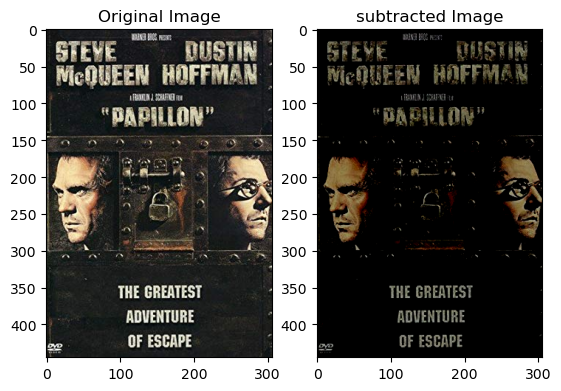

In [9]:
subtracted = cv.subtract(image, const_matrix)

plt.subplot(121);plt.imshow(image[...,::-1]);plt.title("Original Image");
plt.subplot(122);plt.imshow(subtracted[...,::-1]);plt.title("subtracted Image");

(1500, 1012, 3)
(1440, 960, 3)


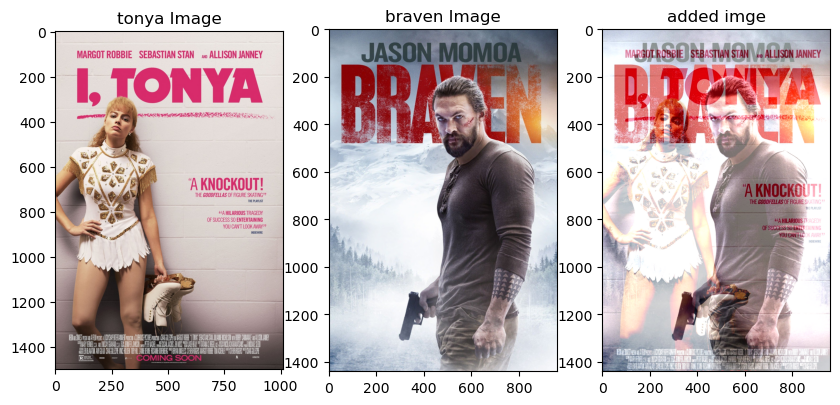

In [55]:
tonya = cv.imread('./tonya.jpg')
braven = cv.imread('./braken.jpg')

print(tonya.shape)
print(braken.shape)

plt.figure(figsize=[10,5])
plt.subplot(131);plt.imshow(tonya[...,::-1]);plt.title("tonya Image");
plt.subplot(132);plt.imshow(braven[...,::-1]);plt.title("braven Image");

sub_matrix = np.ones(braven.shape, dtype = "uint8") * 40
braven = cv.subtract(braven,sub_matrix)

sub_matrix = np.ones(tonya.shape, dtype = "uint8") * 100

tonya = cv.subtract(tonya,sub_matrix)

new_image = cv.add(tonya[:1440,:960,:],braven)

plt.subplot(133);plt.imshow(new_image[...,::-1]);plt.title("added imge");

So, we know that dark pixel addition wont effect on origin picture 

lets doa new try for collecting tonya and braven together

In [63]:
tonya = cv.imread('./tonya.jpg')
braven = cv.imread('./braken.jpg')

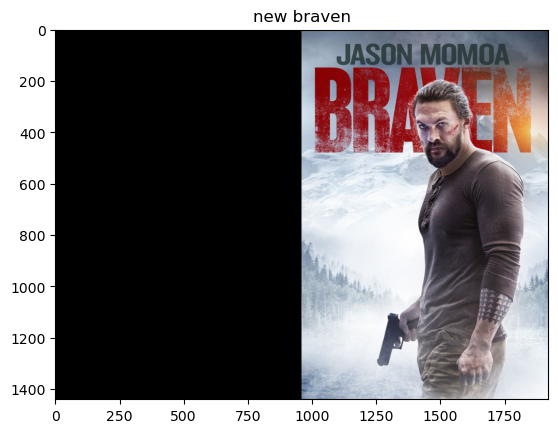

In [64]:
new_braven = np.zeros((1440, 960 * 2,3), "uint8")
new_braven[:, 960: ,:] = braven
plt.imshow(new_braven[...,::-1]);plt.title("new braven");

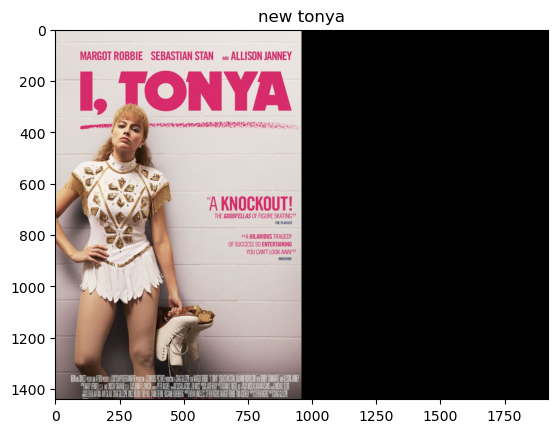

In [65]:
new_tonya = np.zeros((braven.shape[0], braven.shape[1] * 2,3), "uint8")
new_tonya[:, :braven.shape[1] ,:] = tonya[:braven.shape[0],:braven.shape[1],:]
plt.imshow(new_tonya[...,::-1]);plt.title("new tonya");

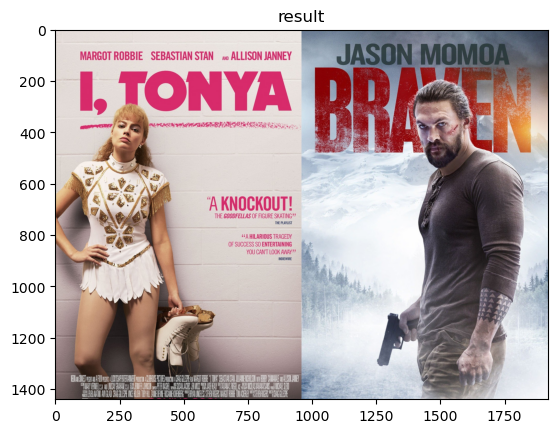

In [66]:
result = cv.add(new_braven , new_tonya)
plt.imshow(result[...,::-1]);plt.title("result");

# weghted additioin

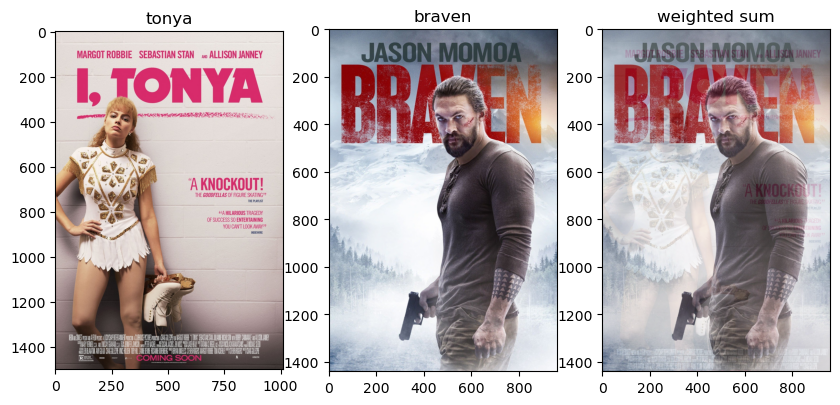

In [71]:
tonya = cv.imread('./tonya.jpg')
braven = cv.imread('./braken.jpg')
output_image = cv.addWeighted(tonya[:braven.shape[0],:braven.shape[1],:],0.35,braven,0.658,0)

plt.figure(figsize=[10,5])
plt.subplot(131);plt.imshow(tonya[...,::-1]);plt.title("tonya");
plt.subplot(132);plt.imshow(braven[...,::-1]);plt.title("braven");
plt.subplot(133);plt.imshow(output_image[...,::-1]);plt.title("weighted sum");